In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
plt.style.use('publication.rc')

In [18]:
f_names = ['/Users/gracetytus/gaps/checkouts/run18rates.txt']
with open(f_names[0]) as in_file:
    variables = next(in_file).strip().split(',')
num_lines = -len(f_names)
for name in f_names:
    with open(name) as in_file:
        num_lines += sum(1 for _ in in_file)
data_dict = {}
for var in variables:
    data_dict[var] = np.zeros(num_lines)

k = 0
progress_bar = tqdm(total=num_lines)
for name in f_names:
    with open(name) as in_file:
        next(in_file)
        for line in in_file:
            for j, dat in enumerate(line.strip().split(',')):
                data_dict[variables[j]][k] = float(dat)
            k += 1
            progress_bar.update(1)



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:14<00:00,  1.21it/s]


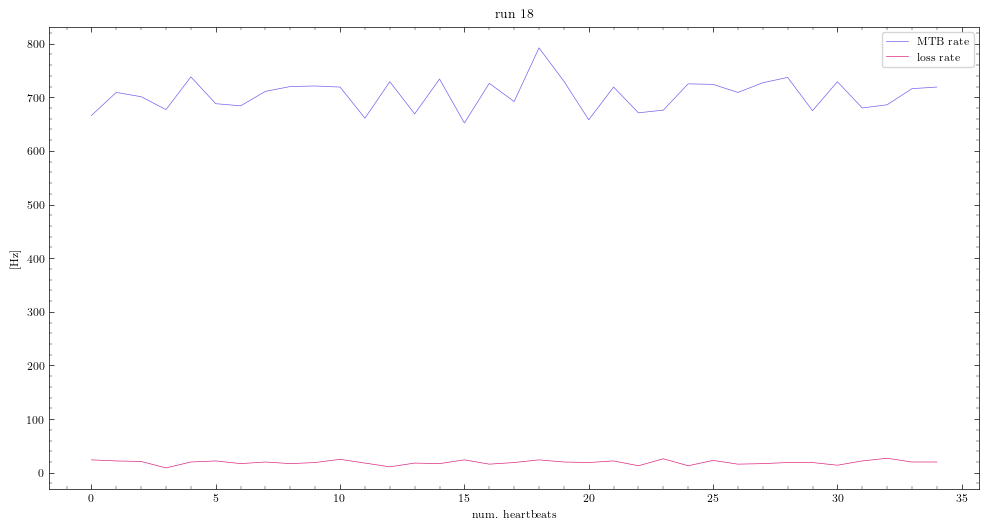

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(data_dict['t_rate'], label = 'MTB rate')
ax.plot(data_dict['l_rate'], label = 'loss rate')
ax.set_ylabel('[Hz]')
ax.set_xlabel('num. heartbeats')
ax.set_title('run 18')
ax.minorticks_on()
plt.legend()
plt.show()